In [1]:
import image_utils as iu
import alpha_utils as au
import model
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

/home/mulns/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
scale = 4

hr_fg, _ = iu.modcrop(misc.imread("./Images/fg/puppy.jpg", "F"), scale)
hr_bg, _ = iu.modcrop(misc.imresize(misc.imread("./Images/bg/grass.jpg", "F"), hr_fg.shape), scale)
hr_alpha, _ = iu.modcrop(misc.imread("./Images/Alpha/puppy.jpg", "F"), scale)
hr_alpha /= 255.
if len(hr_alpha.shape)!= 2 : hr_alpha = hr_alpha[:,:,0]
hr_mi = au.merge_mi(hr_fg, hr_bg, hr_alpha)

lr_mi = misc.imresize(hr_mi, 1/scale, interp="bicubic")
lr_bg = misc.imresize(hr_bg, 1/scale, interp="bicubic")
lr_fg = misc.imresize(hr_fg, 1/scale, interp="bicubic")

# Generate LR alpha using interplotion
lr_alpha = misc.imresize(hr_alpha, 1/scale, interp="bicubic")/255.

/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and wi

# Bicubic and Mine

## Purely bicubic

Bicubic interp has psnr of:  24.46061273787723


/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


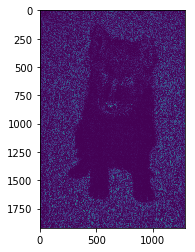

In [3]:
sr_mi1 = misc.imresize(lr_mi, hr_mi.shape, interp="bicubic")
print("Bicubic interp has psnr of: ", au.psnr(sr_mi1, hr_mi))
plt.imshow(np.uint8(np.abs(sr_mi1 - hr_mi)))

## Using alpha matting

In [4]:
sr_fg = misc.imresize(lr_fg, hr_fg.shape, interp="bicubic")
sr_bg = misc.imresize(lr_bg, hr_bg.shape, interp="bicubic")
sr_alpha = misc.imresize(lr_alpha, hr_alpha.shape, interp="bicubic")/255.


/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Alpha+bicubic has psnr of:  24.460286263268518


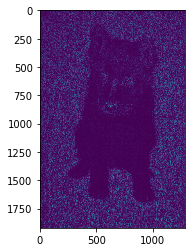

In [5]:
# sr_alpha = au.alpha_uscale(lr_alpha, 2, innex=(9,9), outex=(9,9), innup=(9,9), outup=(9,9))
sr_mi2 = au.merge_mi(sr_fg, sr_bg, sr_alpha)
print("Alpha+bicubic has psnr of: ", au.psnr(sr_mi2, hr_mi))
plt.imshow(np.uint8(np.abs(sr_mi2 - hr_mi)))

** a little bit progress **

## Using mine

In [6]:
# sr_alpha = au.alpha_uscale(lr_alpha, scale, innex=(9,9), outex=(9,9), innup=(9,9), outup=(9,9))
sr_alpha = au.alpha_uscale(lr_alpha, scale, innex=(3,3), outex=(1,1), innup=(4,4), outup=(14,14))


Alpha+bicubic has psnr of:  24.459171515748093


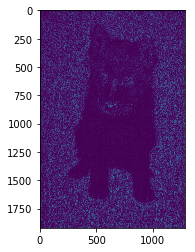

In [7]:
sr_mi3 = au.merge_mi(sr_fg, sr_bg, sr_alpha)
print("Alpha+bicubic has psnr of: ", au.psnr(sr_mi3, hr_mi))
plt.imshow(np.uint8(np.abs(sr_mi3 - hr_mi)))

In [8]:
sr_alpha = hr_alpha

Alpha+bicubic has psnr of:  24.46539878845215


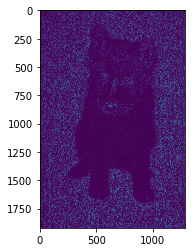

In [9]:
sr_mi4 = au.merge_mi(sr_fg, sr_bg, sr_alpha)
print("Alpha+bicubic has psnr of: ", au.psnr(sr_mi4, hr_mi))
plt.imshow(np.uint8(np.abs(sr_mi4 - hr_mi)))